In [ ]:
import os
import warnings
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
# from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

warnings.filterwarnings('ignore')

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
# Define the path to the directory
data_folder_path = '/content/drive/MyDrive/TUM/Advanced Seminar: Data Science in Finance/Data Science in Finance: Documents/Data'

file_path1 = os.path.join(data_folder_path, 'Combined_News_DJIA.csv')
file_path2 = os.path.join(data_folder_path, 'RedditNews.csv')
file_path3 = os.path.join(data_folder_path, 'upload_DJIA_table.csv')

combined_data = pd.read_csv(file_path1)
DJIA_data = pd.read_csv(file_path3)

In [ ]:
file_path='/Combined_News_DJIA.csv'
file_path2='/upload_DJIA_table.csv'

combined_data=pd.read_csv(file_path)
DJIA_data=pd.read_csv(file_path2)

In [ ]:
combined_data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [ ]:
DJIA_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [ ]:
# Combining the data set with the Market price movement
full_data = combined_data.merge(DJIA_data, how="inner", on="Date")

In [ ]:
full_data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top22,Top23,Top24,Top25,Open,High,Low,Close,Volume,Adj Close
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,b'Taliban wages war on humanitarian aid workers',"b'Russia: World ""can forget about"" Georgia\'s...",b'Darfur rebels accuse Sudan of mounting major...,b'Philippines : Peace Advocate say Muslims nee...,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688


#Data Preparation

In [ ]:
combined_data.isnull().sum()

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64

In [ ]:
# make a working copy
df1 = combined_data.copy()

In [ ]:
# remove null values
df1.dropna(inplace=True)

# filling the null values with median

# df['Top23'].fillna(df['Top23'].median, inplace=True)
# df['Top24'].fillna(df['Top24'].median, inplace=True)
# df['Top25'].fillna(df['Top25'].median, inplace=True)

In [ ]:
# function for cleaning the data
def clean_data(dataset):
    data = dataset.iloc[:,2:27]
    data.replace("[^a-zA-Z]", " ", regex=True, inplace=True)
    return data

# function for combining the headlines of all the columns into single column
def combine_data(data):
    headlines = []
    for i in range(len(data.index)):
        headlines.append(' '.join(str(x) for x in data.iloc[i, :]))
    return headlines

# function to perform lemmatization of the word
def lemmatize_data(data, lemmatizer):
    cleaned_dataset = []
    for i in range(len(data)):
        clean_text = data[i].lower()
        clean_text = clean_text.split()
        clean_text = [lemmatizer.lemmatize(word) for word in clean_text if word not in stopwords.words('english')]
        cleaned_dataset.append(' '.join(clean_text))
    return cleaned_dataset

# function to vectorize the data
def vectorize_data(data, cv):
    vectorized_dataset = cv.fit_transform(data)
    return vectorized_dataset

# function to find the plority of a sentence
def analize_sentiment(text):
    analysis = TextBlob((str(text)))
    return analysis.polarity

In [ ]:
# split with a chronological cut

train = df1[df1['Date'] < '2015-01-01']
test = df1[df1['Date'] > '2014-12-31']

In [ ]:
print(train.shape, test.shape)

(1608, 27) (378, 27)


In [ ]:
# clean train and test data
clean_train_data = clean_data(train)
clean_test_data = clean_data(test)

In [ ]:
# combine the headlines in single column
comb_train_data = combine_data(clean_train_data)
comb_test_data = combine_data(clean_test_data)

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
# lemmatize data
train_data = lemmatize_data(comb_train_data, lemmatizer)
test_data = lemmatize_data(comb_test_data, lemmatizer)

In [ ]:
cv = CountVectorizer(ngram_range=(2,2))

In [ ]:
# vectorize data
vec_train_data = vectorize_data(train_data, cv)
vec_test_data = cv.transform(test_data)

#Basic Modeling

Random forest without hyperparameter tuning

In [ ]:
# create classifier
rf_classifier = RandomForestClassifier(n_estimators=200, criterion='entropy')
rf_classifier.fit(vec_train_data, train['Label'])

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [ ]:
# predict
predictions = rf_classifier.predict(vec_test_data)

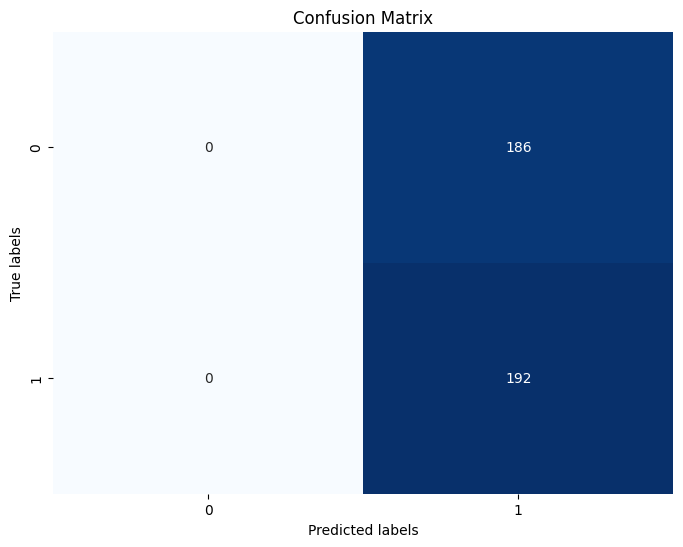

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       186
           1       0.51      1.00      0.67       192

    accuracy                           0.51       378
   macro avg       0.25      0.50      0.34       378
weighted avg       0.26      0.51      0.34       378



In [ ]:
cm = confusion_matrix(test['Label'], predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Display classification report
print("Classification Report:")
print(classification_report(test['Label'], predictions))

In [ ]:
# accuracy and f1 scores

print('Accuracy:', accuracy_score(test['Label'], predictions))
print('F1 Score:', f1_score(test['Label'], predictions))

Accuracy: 0.5079365079365079
F1 Score: 0.6736842105263158


XGBoost without hyperparameter tuning

In [ ]:
ngram = [1, 2, 3, 4, 5]

for i in ngram:
  cv = CountVectorizer(ngram_range=(i, i))

  # vectorize data
  vec_train_data = vectorize_data(train_data, cv)
  vec_test_data = cv.transform(test_data)

  xgb = XGBClassifier(random_state=1)
  xgb.fit(vec_train_data, train['Label'])
  predictions = xgb.predict(vec_test_data)

  accuracy = accuracy_score(test['Label'], predictions)
  f1 = f1_score(test['Label'], predictions)

  print('max number of features used : {}'.format(i))
  print('ngram_range ({}, {})'.format(i, i))
  print('Accuracy:', accuracy)
  print('F1 Score:', f1)

  matrix = confusion_matrix(test['Label'], predictions)
  print('confusion matrix : {}'.format(matrix))
  print('========================================')

max number of features used : 1
ngram_range (1, 1)
Accuracy: 0.5158730158730159
F1 Score: 0.5653206650831355
confusion matrix : [[ 76 110]
 [ 73 119]]
max number of features used : 2
ngram_range (2, 2)
Accuracy: 0.5291005291005291
F1 Score: 0.5637254901960784
confusion matrix : [[ 85 101]
 [ 77 115]]
max number of features used : 3
ngram_range (3, 3)
Accuracy: 0.5396825396825397
F1 Score: 0.6282051282051283
confusion matrix : [[ 57 129]
 [ 45 147]]
max number of features used : 4
ngram_range (4, 4)
Accuracy: 0.5185185185185185
F1 Score: 0.6617100371747211
confusion matrix : [[ 18 168]
 [ 14 178]]
max number of features used : 5
ngram_range (5, 5)
Accuracy: 0.5052910052910053
F1 Score: 0.6701940035273369
confusion matrix : [[  1 185]
 [  2 190]]


In [ ]:
# best n-gram configuration model

cv = CountVectorizer(ngram_range=(3, 3))

# vectorize data
vec_train_data = vectorize_data(train_data, cv)
vec_test_data = cv.transform(test_data)

xgb = XGBClassifier(random_state=1)
xgb.fit(vec_train_data, train['Label'])
predictions = xgb.predict(vec_test_data)

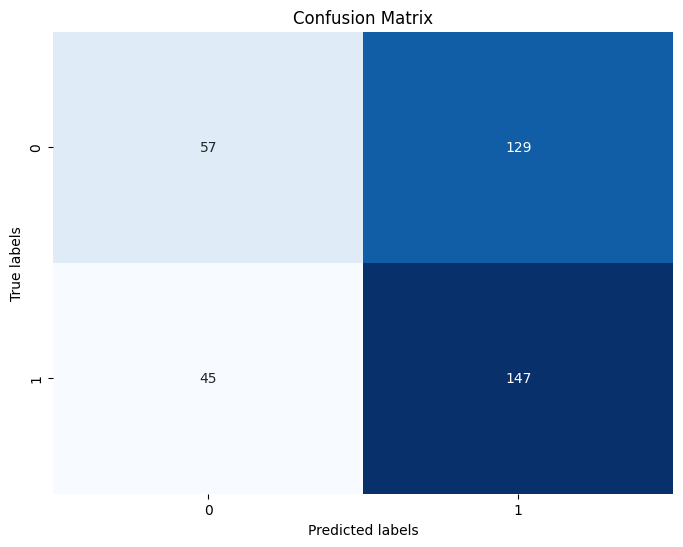

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.31      0.40       186
           1       0.53      0.77      0.63       192

    accuracy                           0.54       378
   macro avg       0.55      0.54      0.51       378
weighted avg       0.55      0.54      0.51       378



In [ ]:
cm = confusion_matrix(test['Label'], predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Display classification report
print("Classification Report:")
print(classification_report(test['Label'], predictions))

In [ ]:
# accuracy and f1 scores

print('Accuracy:', accuracy_score(test['Label'], predictions))
print('F1 Score:', f1_score(test['Label'], predictions))

Accuracy: 0.5396825396825397
F1 Score: 0.6282051282051283


Sentiment Analyisis

In [ ]:
train_sentiment = train.drop(['Date', 'Label'], axis=1)

for column in train_sentiment:
    train_sentiment[column] = train_sentiment[column].apply(analize_sentiment)  #converting the train headlines into polarity scores
train_sentiment = train_sentiment+10  # removing negative coefficient from the datset for better performance

test_sentiment = test.drop(['Date', 'Label'], axis=1)

for column in test_sentiment:
    test_sentiment[column]=test_sentiment[column].apply(analize_sentiment) # converting the test headlines into ploarity
test_sentiment = test_sentiment+10 # removing negative coefficient from the datset for better performance

In [ ]:
train_sentiment

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,10.000000,10.000000,10.000000,10.050000,9.692857,9.948148,10.000,9.800000,9.900000,10.000000,...,10.350000,10.000000,9.900000,10.078788,10.000000,9.300000,10.000000,10.000000,9.900000,10.000000
1,10.000000,9.844444,10.100000,10.000000,10.000000,10.136364,9.575,10.250000,10.600000,10.000000,...,9.600000,10.250000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.500000,10.000000
2,10.000000,10.000000,9.750000,9.125000,10.000000,10.000000,10.000,10.022222,9.975000,10.000000,...,10.250000,10.285714,9.666667,9.400000,10.000000,10.000000,10.000000,9.800000,10.136364,10.000000
3,10.000000,10.000000,9.800000,9.787037,10.175000,10.000000,10.000,10.000000,10.000000,10.500000,...,9.600000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.900000,10.000000
4,10.000000,10.000000,10.400000,9.766667,9.800000,9.500000,10.625,10.166667,10.000000,9.900000,...,10.100000,10.000000,10.066667,10.000000,10.068182,10.000000,10.000000,10.000000,10.062500,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1606,10.000000,10.000000,10.000000,9.919444,10.000000,9.533333,10.000,10.000000,9.925000,10.487500,...,10.000000,9.844444,10.000000,10.000000,9.920000,10.000000,10.000000,10.000000,9.800000,10.000000
1607,10.128788,9.875000,10.000000,10.238095,10.068182,10.050000,10.150,9.966667,9.800000,10.044444,...,10.000000,10.000000,10.136364,10.000000,10.000000,9.868182,9.891667,10.012121,9.775000,10.000000
1608,10.000000,10.000000,10.000000,10.000000,10.000000,9.950000,10.000,9.500000,9.981250,9.900000,...,10.100000,10.025000,10.000000,9.000000,10.000000,10.000000,10.500000,10.125000,10.000000,10.000000
1609,10.000000,9.968182,10.000000,10.000000,10.050000,10.000000,10.000,9.633333,10.136364,10.000000,...,10.400000,10.000000,9.900000,9.997727,10.333333,9.814815,10.000000,10.400000,10.000000,10.129545


In [ ]:
# sentiment XGBoost model

xgb = XGBClassifier(random_state=1)
xgb.fit(train_sentiment, train['Label'])
predictions = xgb.predict(test_sentiment)

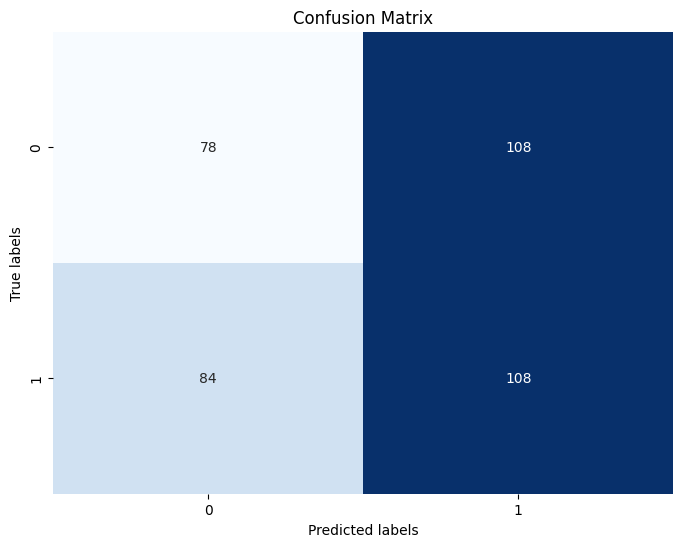

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.42      0.45       186
           1       0.50      0.56      0.53       192

    accuracy                           0.49       378
   macro avg       0.49      0.49      0.49       378
weighted avg       0.49      0.49      0.49       378



In [ ]:
cm = confusion_matrix(test['Label'], predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Display classification report
print("Classification Report:")
print(classification_report(test['Label'], predictions))

In [ ]:
# accuracy and f1 scores

print('Accuracy:', accuracy_score(test['Label'], predictions))
print('F1 Score:', f1_score(test['Label'], predictions))

Accuracy: 0.49206349206349204
F1 Score: 0.5294117647058824


#Data Preparation

In [ ]:
# make a working copy
df2 = full_data.copy()

In [ ]:
headlines = []
for row in range(0, len(df2.index)):
    headlines.append(" ".join(str(x) for x in df2.iloc[row,2:27]))

In [ ]:
clean_headlines = []
for i in range(0, len(headlines)):
    clean_headlines.append(re.sub("b[(')]", '', headlines[i])) #remove b'
    clean_headlines[i]=re.sub('b[(")]', '', clean_headlines[i]) #remove b"
    clean_headlines[i]=re.sub("\'", '', clean_headlines[i]) #remove \'

In [ ]:
df2['Combined_News'] = clean_headlines

#Advanced Modeling

In [ ]:
import tqdm
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split, cross_val_score
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from bs4 import BeautifulSoup
import unicodedata
from nltk.tokenize import word_tokenize

In [ ]:
# one hot encoding using keras tokenizer and pad sequencing
X = df2['Combined_News']
y = df2['Label']

# encoder = LabelEncoder()
# y = encoder.fit_transform(merge['Combined_News'])

print("shape of input data: ", X.shape)
print("shape of target variable: ", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

shape of input data:  (1989,)
shape of target variable:  (1989,)


In [ ]:
def remove_accented_characters(text):
    text =  unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

def stop_words(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    filtered_sentence = []

    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
    return filtered_sentence


In [ ]:
def preprocessor_engine(text):
    corpus =[]
    for sent in tqdm.tqdm(text):
        sent = remove_accented_characters(sent)
        sent = stop_words(sent)
        corpus.append(sent)
    return corpus

In [ ]:
train_data_pro = preprocessor_engine(X_train)

100%|██████████| 1591/1591 [00:05<00:00, 303.90it/s]


In [ ]:
test_data_pro = preprocessor_engine(X_test)

100%|██████████| 398/398 [00:01<00:00, 279.93it/s]


In [ ]:
tokenizer = Tokenizer(oov_token='<UNK>')
tokenizer.fit_on_texts(train_data_pro) # build the word index

In [ ]:
train_sequences = tokenizer.texts_to_sequences(train_data_pro)
test_sequences = tokenizer.texts_to_sequences(test_data_pro)

In [ ]:
MAX_SEQUENCE_LENGTH = 424

train_pad_sequences = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, maxlen = MAX_SEQUENCE_LENGTH, padding='post')
test_pad_sequneces = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen = MAX_SEQUENCE_LENGTH, padding='post')

In [ ]:
total_words = len(tokenizer.word_index) + 1

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Dropout
from keras.layers import Conv1D, SimpleRNN, Bidirectional, MaxPooling1D, GlobalMaxPool1D, LSTM, GRU
from keras.regularizers import L1L2
from keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 300, input_length=MAX_SEQUENCE_LENGTH ))
model.add(Bidirectional(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))
model.add(Bidirectional(SimpleRNN(128, dropout=0.3, recurrent_dropout=0.3, return_sequences=True)))
model.add(Bidirectional(SimpleRNN(64, dropout=0.3, recurrent_dropout=0.3, return_sequences=True)))
model.add(Bidirectional(SimpleRNN(32, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 424, 300)          11151300  
                                                                 
 bidirectional (Bidirection  (None, 424, 256)          109824    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 424, 256)          98560     
 onal)                                                           
                                                                 
 bidirectional_2 (Bidirecti  (None, 424, 128)          41088     
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 64)                10304     
 onal)                                                  

In [ ]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    train_pad_sequences,
    y_train,
    batch_size=128,
    epochs=5,
    validation_split=0.1,
    callbacks=[early_stopping]
)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_pad_sequneces, y_test, verbose=0)
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}")

Epoch 1/5
12/12 [==============================] - 102s 7s/step - loss: 0.8377 - accuracy: 0.4780 - val_loss: 1.0555 - val_accuracy: 0.4375
Epoch 2/5
12/12 [==============================] - 84s 7s/step - loss: 0.7982 - accuracy: 0.5115 - val_loss: 0.8399 - val_accuracy: 0.4375
Epoch 3/5
12/12 [==============================] - 82s 7s/step - loss: 0.7952 - accuracy: 0.5143 - val_loss: 0.7178 - val_accuracy: 0.5063
Epoch 4/5
12/12 [==============================] - 86s 7s/step - loss: 0.7601 - accuracy: 0.5171 - val_loss: 0.7611 - val_accuracy: 0.4812
Epoch 5/5
12/12 [==============================] - 84s 7s/step - loss: 0.7828 - accuracy: 0.4934 - val_loss: 0.7554 - val_accuracy: 0.4563
Test loss: 0.7194, Test accuracy: 0.5352


Linear Discriminant Analysis

In [ ]:
!pip3 install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.3 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

def getSIA(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    return sentiment

In [ ]:
df2.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top23,Top24,Top25,Open,High,Low,Close,Volume,Adj Close,Combined_News
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,Georgia downs two Russian warplanes as countri...
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,Why wont America and Nato help us? If they won...
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,Remember that adorable 9-year-old who sang at ...
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,U.S. refuses Israel weapons to attack Iran: r...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,"b'Russia: World ""can forget about"" Georgia\'s...",b'Darfur rebels accuse Sudan of mounting major...,b'Philippines : Peace Advocate say Muslims nee...,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,All the experts admit that we should legalise ...


In [ ]:
compound = []
neg = []
pos = []
neu = []
SIA = 0

for i in tqdm.tqdm(range(0, len(df2['Combined_News']))):
    SIA = getSIA(df2['Combined_News'][i])
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    pos.append(SIA['pos'])
    neu.append(SIA['neu'])

100%|██████████| 1989/1989 [01:27<00:00, 22.66it/s]


In [ ]:
df2['Subjectivity'] = df2['Combined_News'].apply(get_subjectivity)
df2['Polarity'] = df2['Combined_News'].apply(get_polarity)
df2['compound'] = compound
df2['neg'] = neg
df2['pos'] = pos
df2['neu'] = neu


In [ ]:
df2['Subjectivity']

0       0.267549
1       0.374806
2       0.536234
3       0.364021
4       0.375099
          ...   
1984    0.352311
1985    0.352649
1986    0.389617
1987    0.382566
1988    0.320261
Name: Subjectivity, Length: 1989, dtype: float64

In [ ]:
df_final = df2[['Label','Open', 'High', 'Low', 'Volume', 'Subjectivity', 'Polarity', 'compound', 'neg', 'pos', 'neu']]
df_quant = df2[['Label','Open', 'High', 'Low', 'Volume']]
df_final.head()

,Label,Open,High,Low,Volume,Subjectivity,Polarity,compound,neg,pos,neu
0,0,11432.089844,11759.959961,11388.040039,212830000,0.267549,-0.048568,-0.9982,0.235,0.041,0.724
1,1,11729.669922,11867.110352,11675.530273,183190000,0.374806,0.121956,-0.9858,0.191,0.089,0.721
2,0,11781.700195,11782.349609,11601.519531,173590000,0.536234,-0.044302,-0.9715,0.128,0.056,0.816
3,0,11632.809570,11633.780273,11453.339844,182550000,0.364021,0.011398,-0.9809,0.146,0.066,0.788
4,1,11532.070312,11718.280273,11450.889648,159790000,0.375099,0.040677,-0.9882,0.189,0.094,0.717


Modeling with the full data, news sentiment analysis included

In [ ]:
X = df_final
X = df_final.drop(['Label'], axis=1).values

In [ ]:
y = np.array(df_final['Label'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)

In [ ]:
lda_model = LinearDiscriminantAnalysis().fit(X_train, y_train)

In [ ]:
predictions = lda_model.predict(X_test)

In [ ]:
import statsmodels.api as sm

# Assuming df is your DataFrame and it's already loaded with the data from the image
X1 = df2[['Open', 'High', 'Low', 'Volume', 'Subjectivity','Polarity','compound']]
X1 = sm.add_constant(X1)
y = df2['Label']
logit_model = sm.Logit(y, X1)
result = logit_model.fit()
summary = result.summary()
print(summary)

Optimization terminated successfully.
         Current function value: 0.308923
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Label   No. Observations:                 1989
Model:                          Logit   Df Residuals:                     1981
Method:                           MLE   Df Model:                            7
Date:                Tue, 16 Jan 2024   Pseudo R-squ.:                  0.5527
Time:                        16:27:15   Log-Likelihood:                -614.45
converged:                       True   LL-Null:                       -1373.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.7590      0.811      2.169      0.030       0.169       3.349
Open            -0.0543

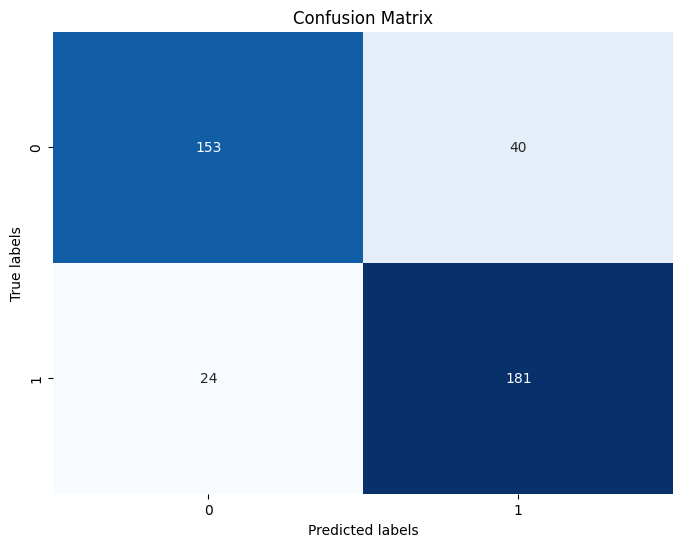

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.79      0.83       193
           1       0.82      0.88      0.85       205

    accuracy                           0.84       398
   macro avg       0.84      0.84      0.84       398
weighted avg       0.84      0.84      0.84       398



In [ ]:
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Display classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

In [ ]:
# accuracy and f1 scores

print('Accuracy:', accuracy_score(y_test, predictions))
print('F1 Score:', f1_score(y_test, predictions))

Accuracy: 0.8391959798994975
F1 Score: 0.8497652582159624


Modeling with only quantitative data

In [ ]:
X = df_quant
X = df_quant.drop(['Label'], axis=1).values

In [ ]:
y = np.array(df_quant['Label'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)

In [ ]:
lda_model = LinearDiscriminantAnalysis().fit(X_train, y_train)

In [ ]:
predictions = lda_model.predict(X_test)

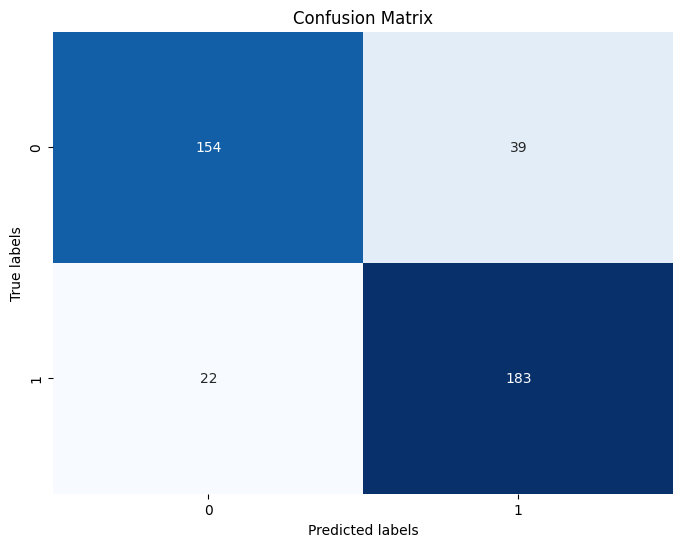

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.80      0.83       193
           1       0.82      0.89      0.86       205

    accuracy                           0.85       398
   macro avg       0.85      0.85      0.85       398
weighted avg       0.85      0.85      0.85       398



In [ ]:
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Display classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

In [ ]:
# accuracy and f1 scores

print('Accuracy:', accuracy_score(y_test, predictions))
print('F1 Score:', f1_score(y_test, predictions))

Accuracy: 0.8467336683417085
F1 Score: 0.8571428571428571


Interesting Findings?! We can't reject the null hypothesis.